# Project Speed Dating

## Project Target

Tinder has experienced a decrease in the number of matches and is trying to understand __what makes people interested in each other__. 
They have provided us with a dataset to understand the drivers for a second date.

## Key Findings

- The dataset is not correctly designed to answer the questions and cannot be used to take actions on Tinder's business model
    - Tinder is a matching application created in 2012 based on pictures and text descriptions
    - The survey is from 2002 and 2004 and is based on real dates from a pre-smartphone era
    - The dataset will not give any actionable findings for Tinder and will require further analysis of the Tinder database
<br>
<br>
- When looking at the dataset, it seems that participants are strongly biased and their scoring cannot be used to truly understand the rationale for matching
    - Intelligence is regularly mentioned as an important attribute but the rating of this characteristic is equal for both positive and negative answers
    - On the other hand, Fun and Shared Interests are not seen as important while they seem to be deal breakers for the final decision
    - Sharing the same race seems important for a large panel but it does not seem to impact the final decision
<br>
<br>
- Attractiveness, the only criterion that unanimously comes out of each analysis, cannot be used to truly understand the rationale for matching
    - Attractiveness is always declared as the most important criterion when participants are rating the criteria
    - The scorecard confirms that participants match with people they rate highly on Attractiveness
    - However, the criterion Attractiveness cannot be quantified and we cannot conclude on why people find other participants attractive
<br>
<br>
- Overall, this dataset is not conclusive because:
    - It is not in line with Tinder's business model
    - The information is too qualitative and not quantitative enough
    - It is mostly based on surveys and therefore very biased

## Recommendation

- Tinder should leverage its internal database to better understand the rationale for matching
    - Tinder is an online app and only online matches should be used to understand the behavior specific to its customers
    - With >65 billion matches overall, there is already an important dataset, which does not require qualitative surveys
<br>
<br>

- Tinder needs to better segment its database and use powerful machine learning tools
    - Information on each participant needs to be more detailed and quantitative to better define the profile of each participant
    - With better segmentation, Tinder should use Supervised and Unsupervised Machine learning tools to get better correlations between each of the segments
<br>
<br>
- Based on this better understanding, Tinder will be able to offer subscriptions that will increase the probability of matching premium users

## Dataset

Let's open and read the dataset

## Dataset

Let's open and read the dataset

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import statistics

df= pd.read_csv('Speed+Dating+Data.csv',encoding='iso-8859-1')
df.shape

(8378, 195)

There are 8,378 lines representing one subject participating to a date and rating it. Let's keep in mind that each date includes 2 persons and is represented by 2 lines in the dataset. Let's check the column of the dataset

In [3]:
for column in df.columns:
    print(column)

iid
id
gender
idg
condtn
wave
round
position
positin1
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
undergra
mn_sat
tuition
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb

There seems to be a large number of columns. By using the dataset description provided by Tinder, here are the different categories:
- **Subject**: id, gender
- **Partner**: id, age, race
- **Wave**: Wave number, position of the date in the wave
- **Date**: decision of partner and subject, match, common interest, final date
- **Scorecards**:
   - Ratings done by the partner and the subject on the partner of the opposite sex
   - Categories: Attractive, Sincere, Intelligent, Fun, Ambitious, Shared Hobbies
- **Survey**: Different surveys have been performed at different times and with different distribution by wave
   - Ranking of the previous criteria on different questions
   - Different questions: what are you looking for? What do you think others from the same sex are looking for? What is the opposite sex looking for? How do you rate yourself? 
   - Different timing: surveys done during the date, a few days after, and a few weeks after
   - Additional survey on students done on only one date

## Scorecard Analysis

As a first approach, let's check the average score of the partner based on the final decision

In [4]:
attributes = ['attr','sinc','intel','fun','amb','shar']
df_positive = df[df['dec']==1]
df_positive_mean = df_positive.groupby(['gender'])[attributes].mean().reset_index()
df_positive_mean

gender      attr      sinc     intel       fun       amb      shar
0       0  7.072787  7.632566  7.932164  7.381710  7.374647  6.583885
1       1  7.448739  7.568112  7.621498  7.296134  6.995148  6.371681

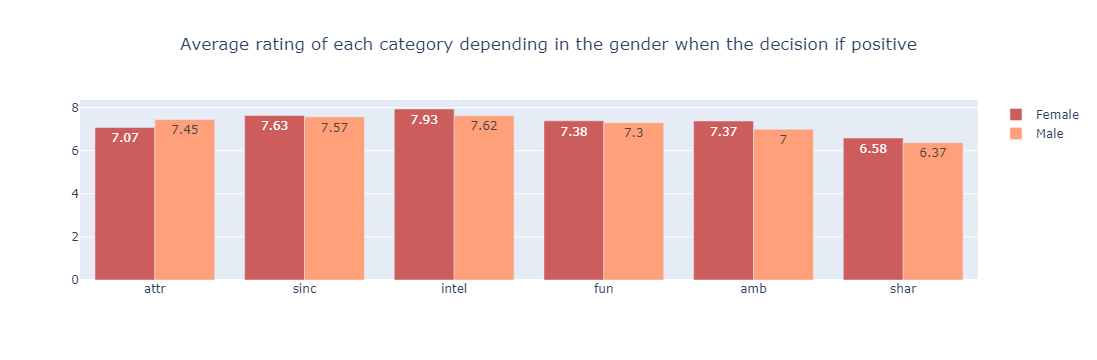

In [52]:

y_female = df_positive_mean.iloc[0,1:]
y_male = df_positive_mean.iloc[1,1:]
column = df_positive_mean.columns[1:]

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=column,
        y = y_female,
        name='Female',
        marker_color='indianred',
        text=round(y_female,2),
        textposition='auto'
    )
)

fig.add_trace(
    go.Bar(
        x=column,
        y = y_male,
        name='Male',
        marker_color='lightsalmon',
        text=round(y_male,2),
        textposition='auto'
    )
)



fig.update_layout(
    title = go.layout.Title(text='Average rating of each category depending in the gender when the decision if positive', x=0.5),
    width=800
)
fig.show()



With this quick graph, we can see that
- All criteria have relatvely high average, as there all except shared interest above 7
- Intelligence has the highest average for both male and female, so it seems to be an important criteria 
- Average attractivness has an higher average for male than for female. It seems that attractivness has an higher role for male
- On the other hand, Ambitious seems to have an higher importance for female


However, let's compare the average rate when the decision is negative 

In [6]:
attributes = ['attr','sinc','intel','fun','amb','shar','like','prob','met']
df_attributes_mean = df.groupby(['gender','dec'])[attributes].mean().reset_index()
df_attributes_mean

gender  dec      attr      sinc     intel       fun       amb      shar  \
0       0    0  5.231626  6.780189  7.157363  5.613764  6.704489  4.695865   
1       0    1  7.072787  7.632566  7.932164  7.381710  7.374647  6.583885   
2       1    0  5.531739  6.952563  6.977426  5.798275  6.237808  4.747230   
3       1    1  7.448739  7.568112  7.621498  7.296134  6.995148  6.371681   

       like      prob       met  
0  5.286137  4.742840  0.965130  
1  7.169743  6.004980  0.929521  
2  5.344513  4.497596  0.898551  
3  7.262097  5.940833  0.996381

Let's put this value in some graph to have a better understanding of the data

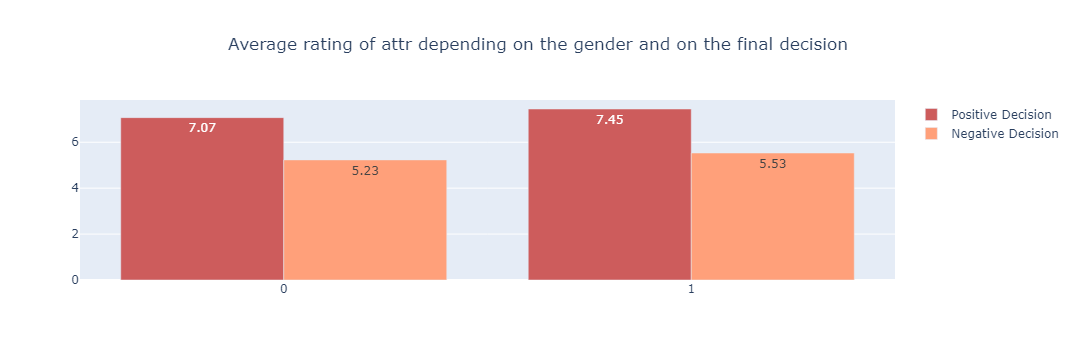

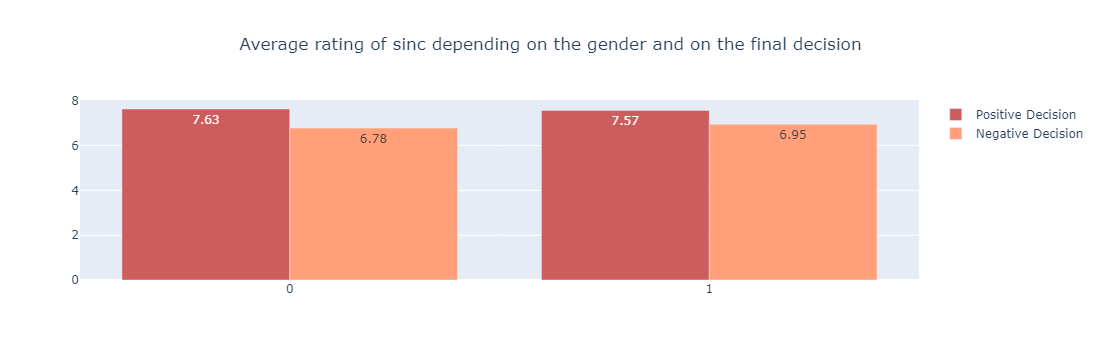

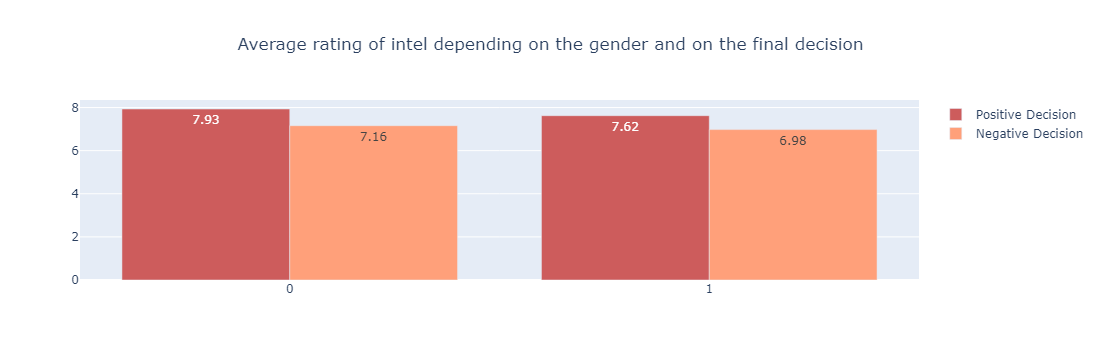

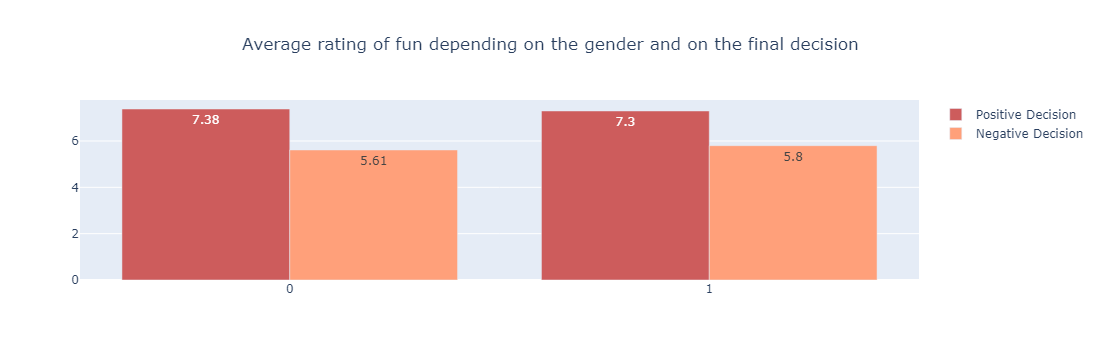

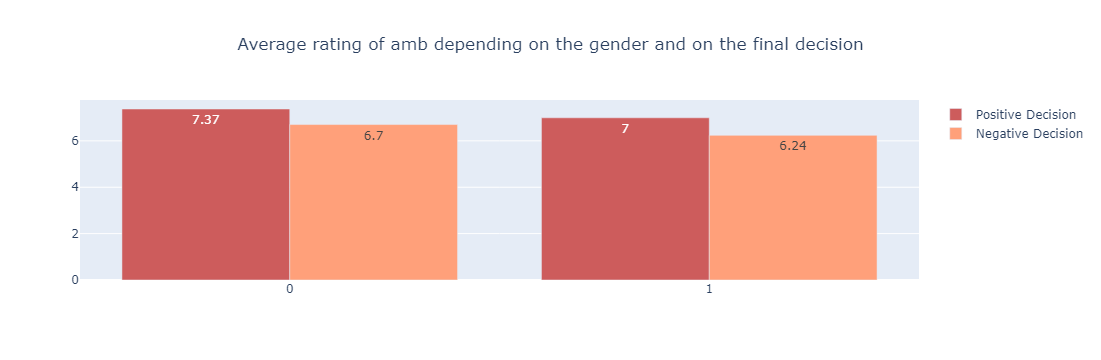

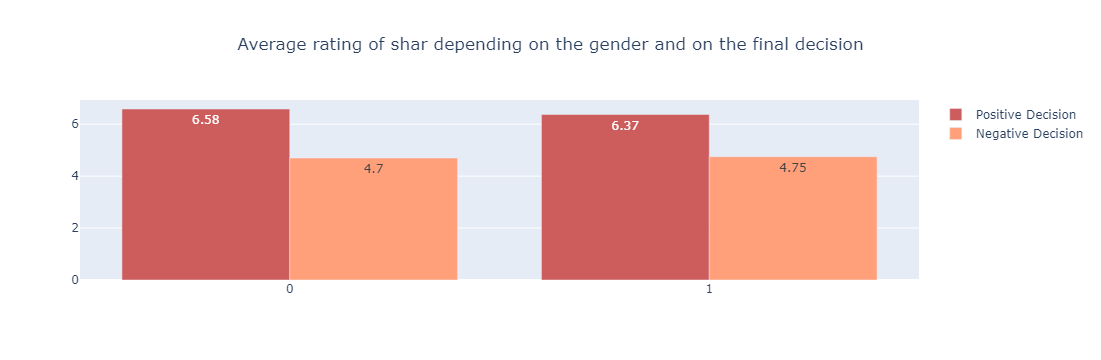

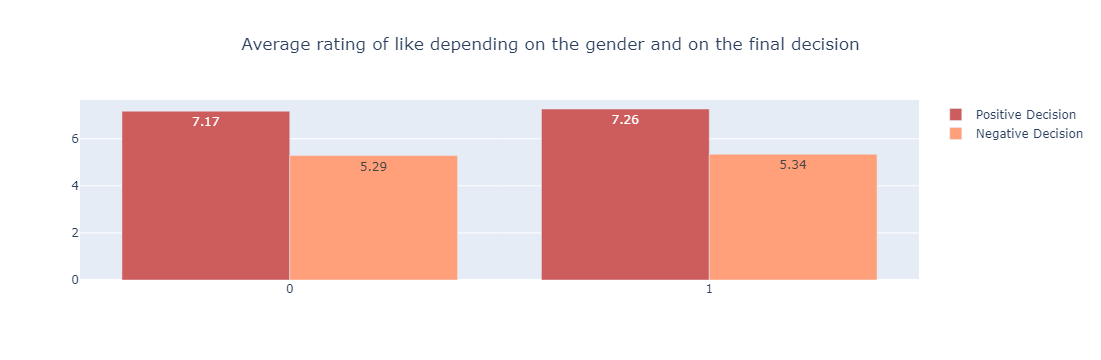

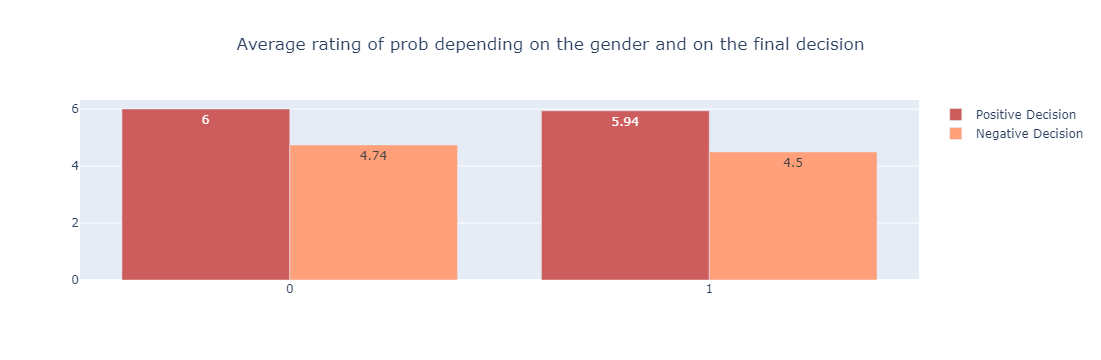

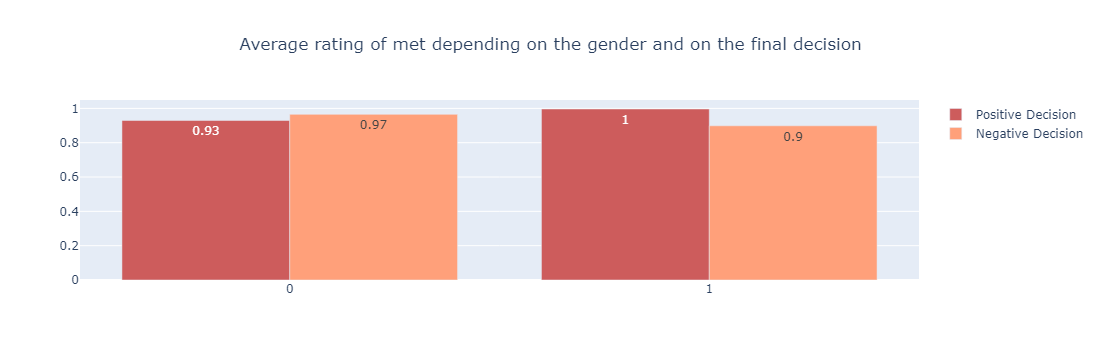

In [7]:

for attribute in attributes:
    fig = go.Figure()
    gender = df_attributes_mean['gender'].unique()

    fig.add_trace(
        go.Bar(
            x=gender,
            y = df_attributes_mean[df_attributes_mean['dec']==1][attribute],
            name='Positive Decision',
            marker_color='indianred',
            text=round(df_attributes_mean[df_attributes_mean['dec']==1][attribute],2),
            textposition='auto'
        )
    )

    fig.add_trace(
        go.Bar(
            x=gender,
            y = df_attributes_mean[df_attributes_mean['dec']==0][attribute],
            name='Negative Decision',
            marker_color='lightsalmon',
            text=round(df_attributes_mean[df_attributes_mean['dec']==0][attribute],2),
            textposition='auto'
        )
    )



    fig.update_layout(
        title = go.layout.Title(text='Average rating of {} depending on the gender and on the final decision'.format(attribute), x=0.5),
        width=800
    )
    fig.show()


What we can deduct from this graph
- All the categories are important for the choice as the average is always higher when the decision if positive
- However, there are discrepencies in the difference of average between a positive and negative decision
    - The Intelligence rating of the negative decision is almost at 7, which shows that a high number of partner where not choosen despite being rated high on Intelligence
    - On the other hand, there is a substantial gap in average between a positive and negative decision for Attractivness, Fun and Shared Interest. It means that if the score is low, there are high change that the partner will be rejectetd


Overall, it seems that these 3 factors are the main factors of decision: Attractivness, Fun and Shared Interest

Let's see the distribution of the rating  confirm it

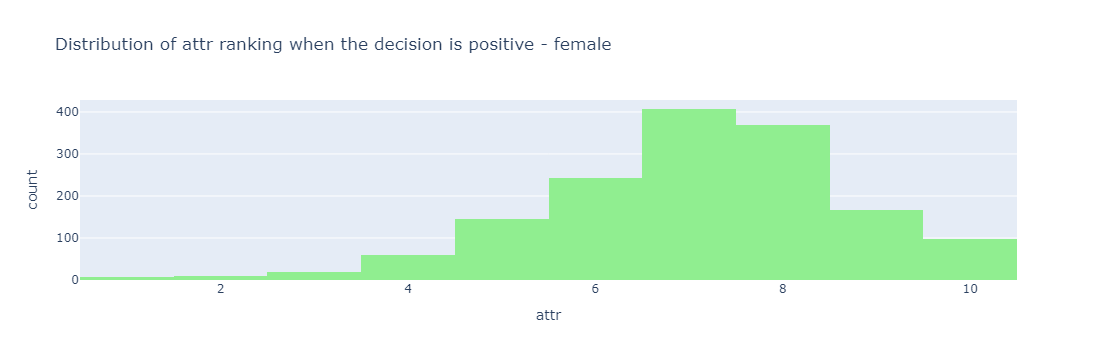

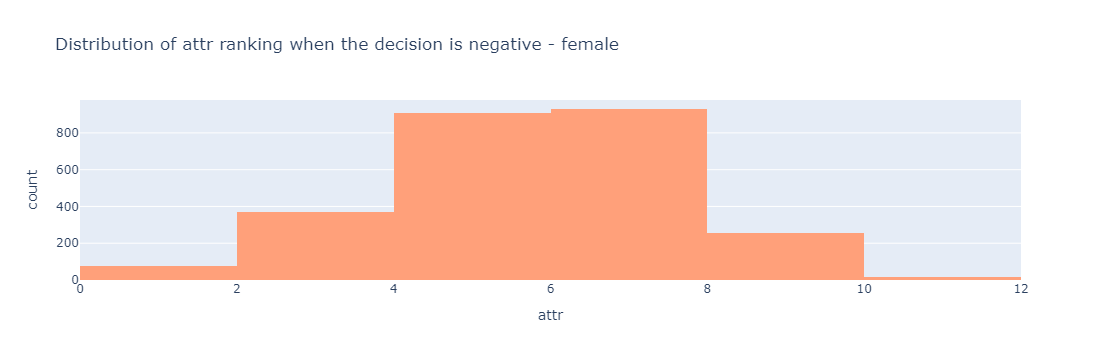

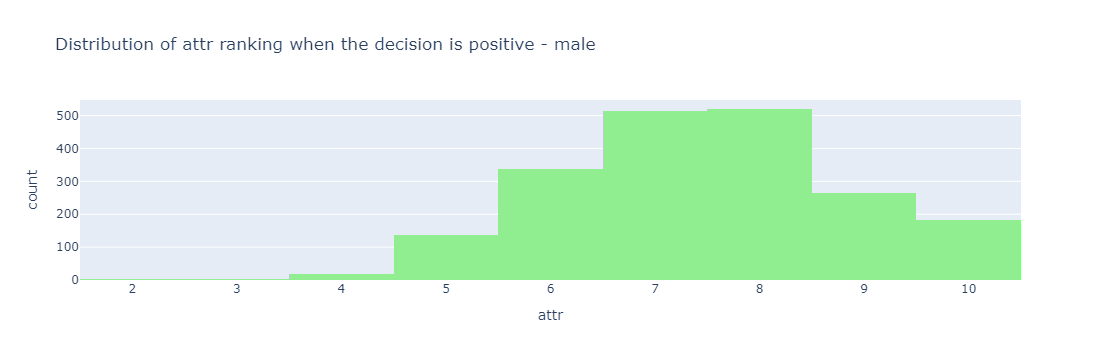

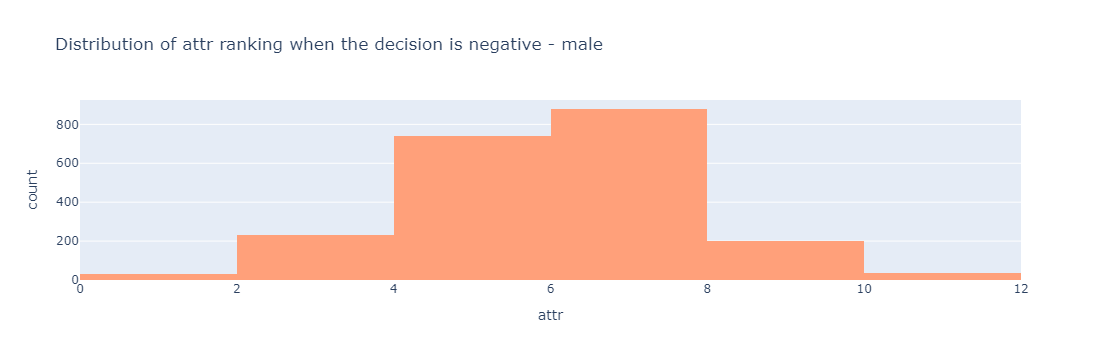

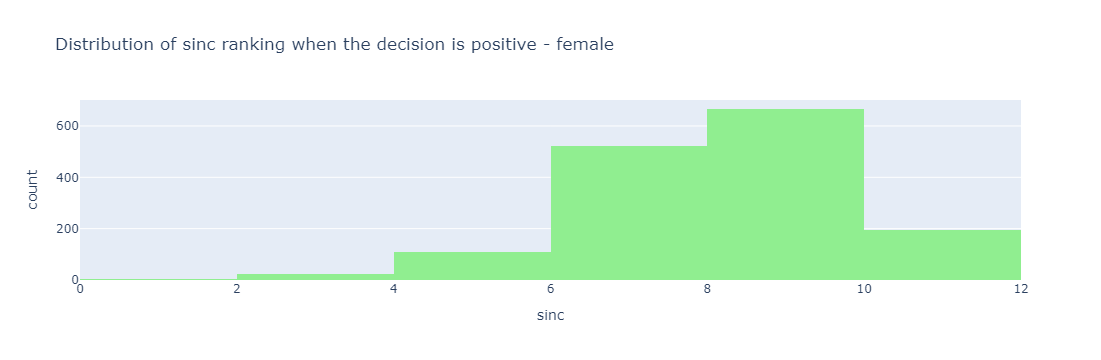

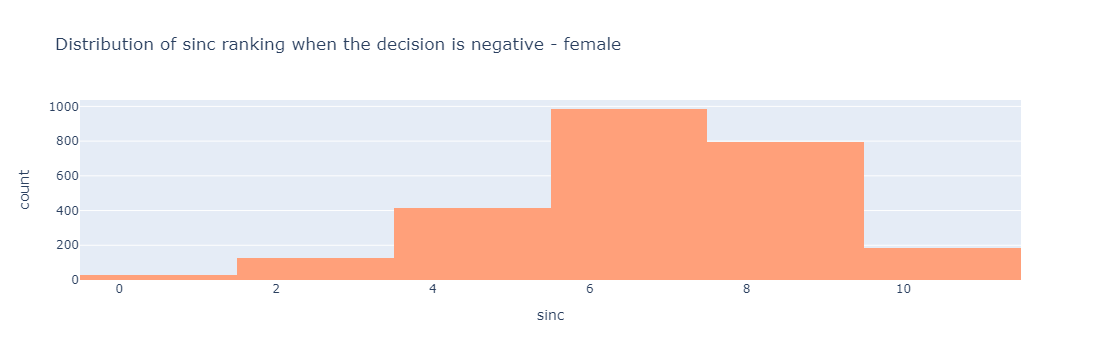

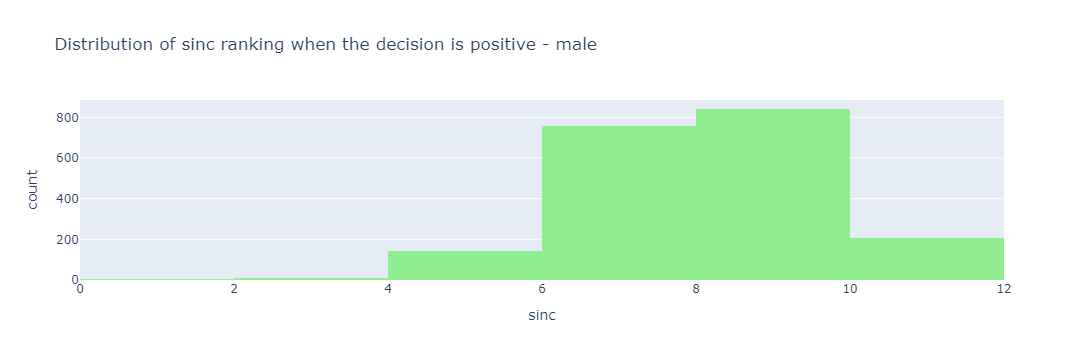

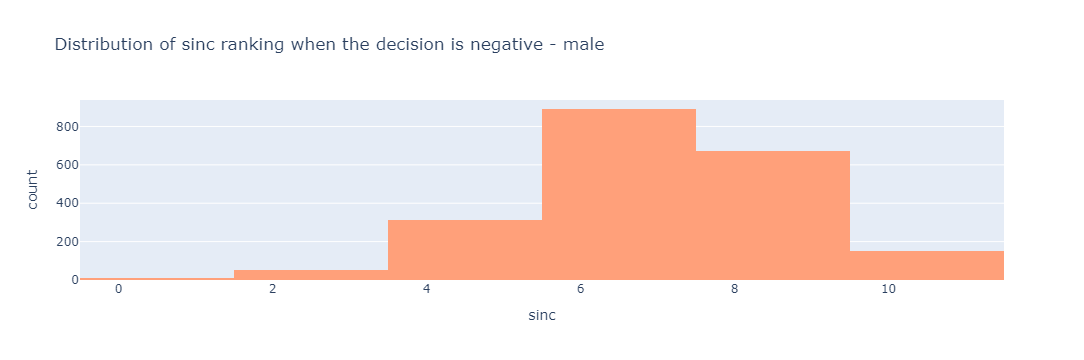

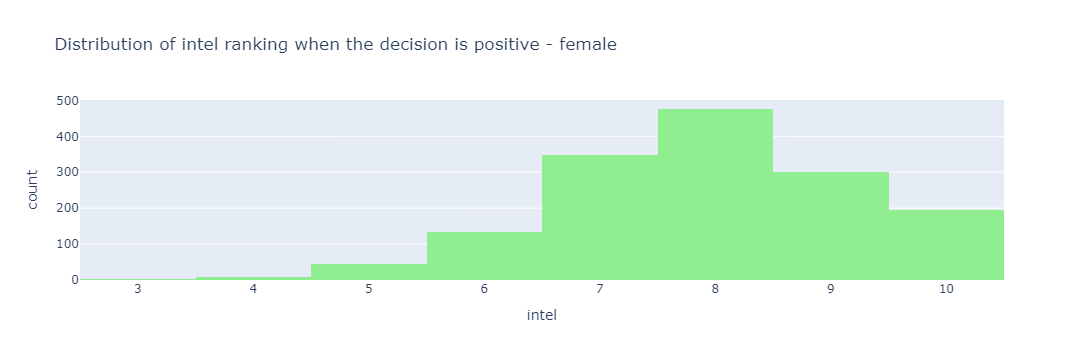

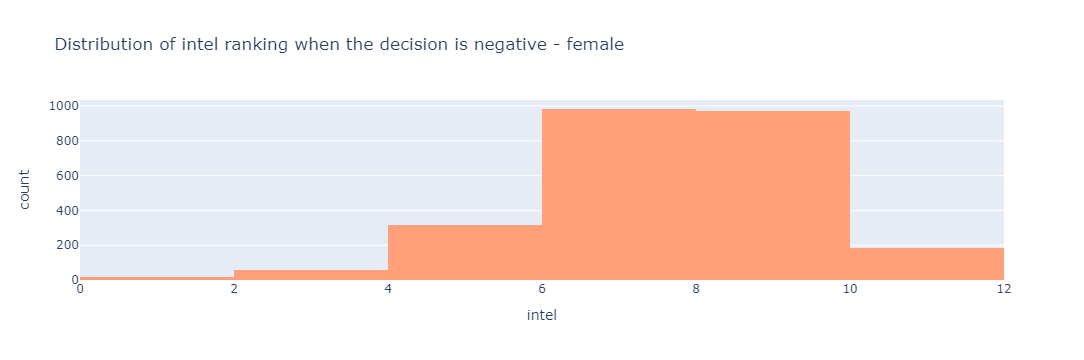

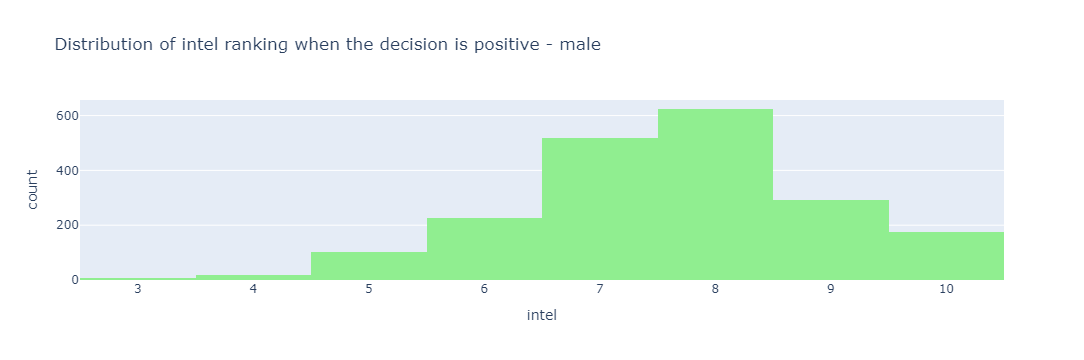

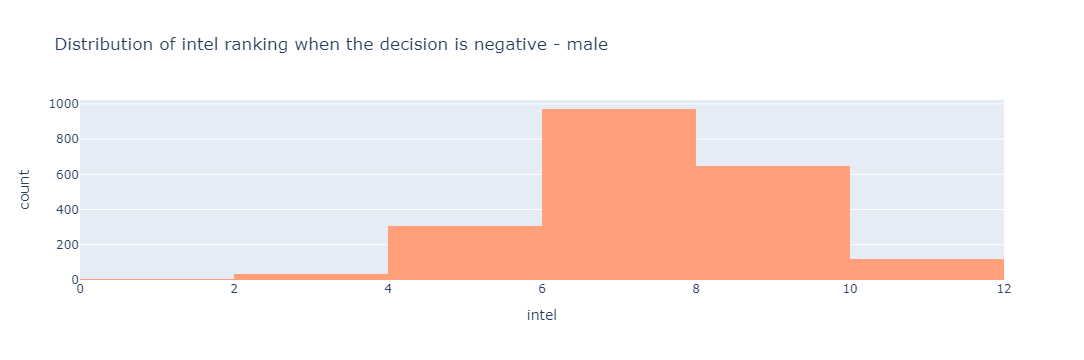

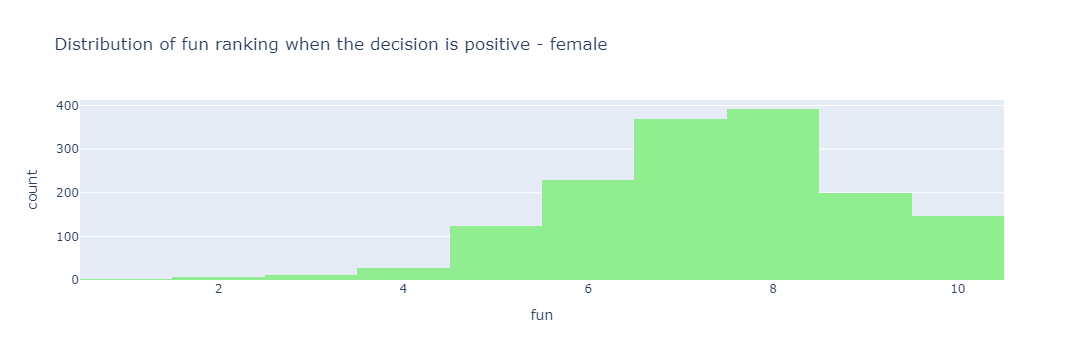

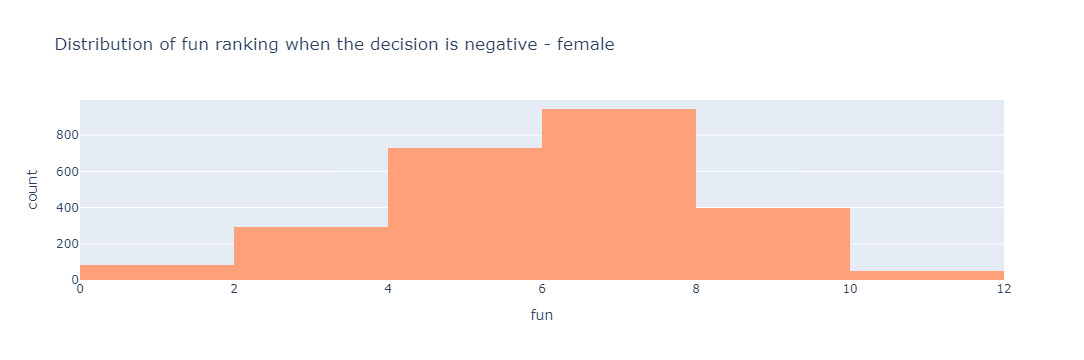

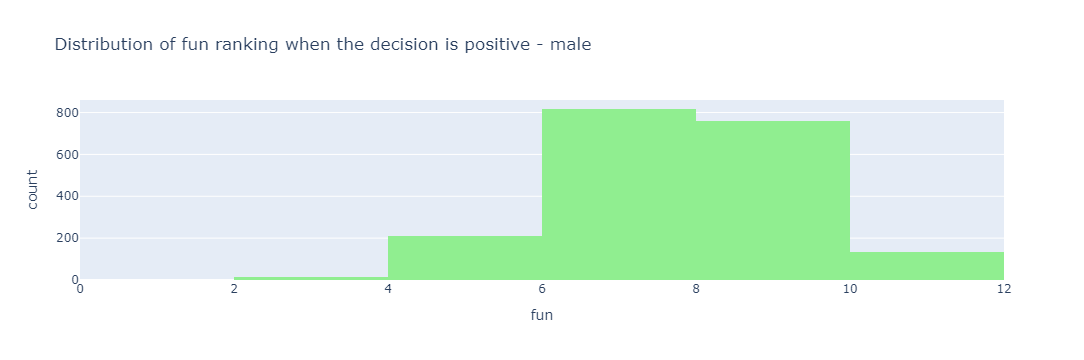

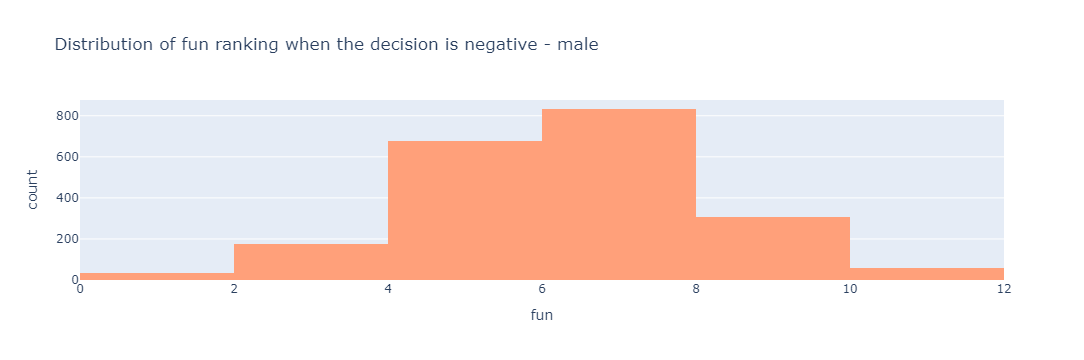

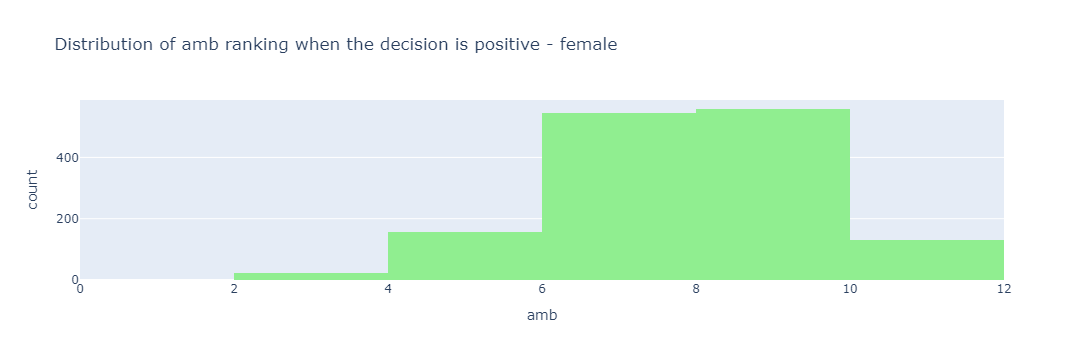

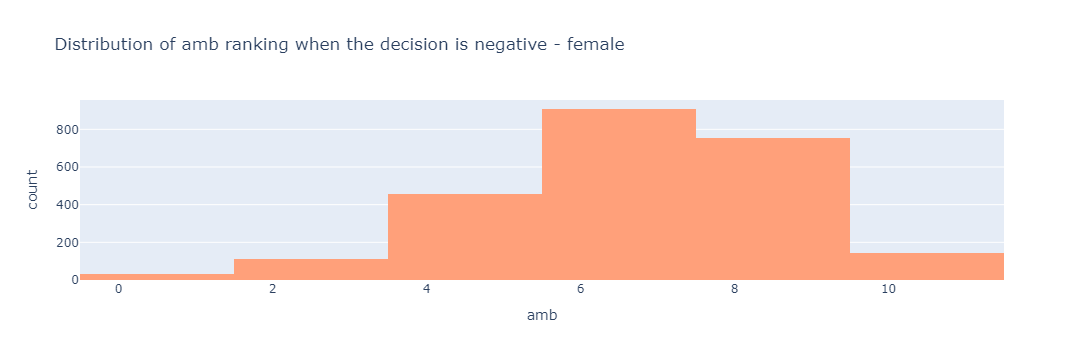

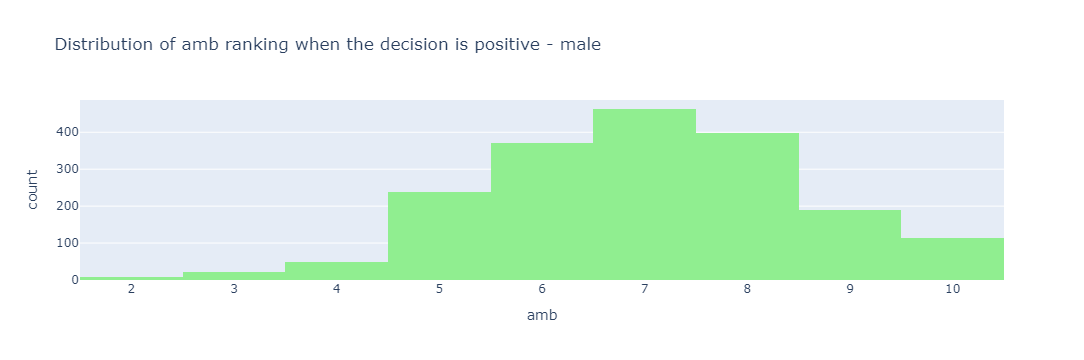

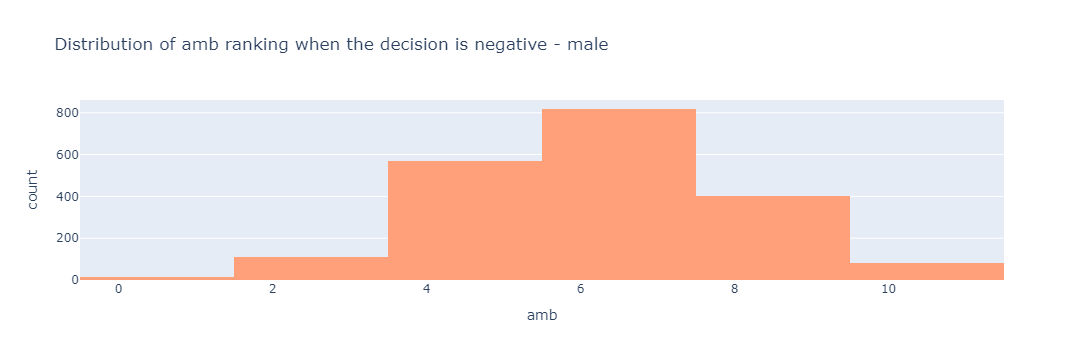

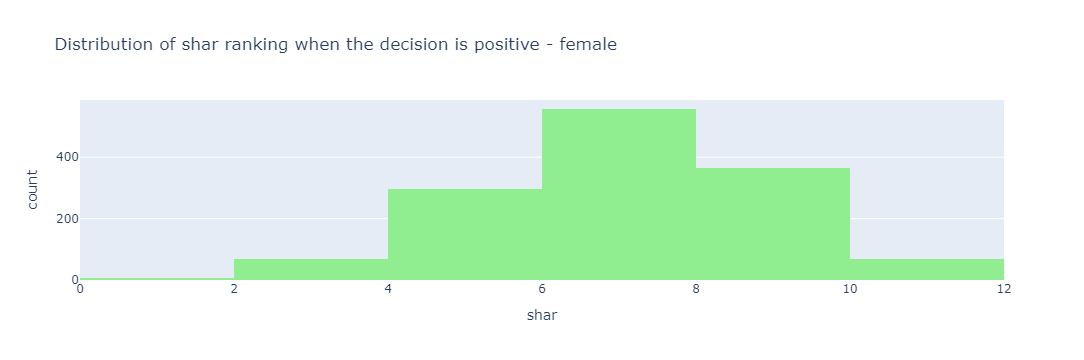

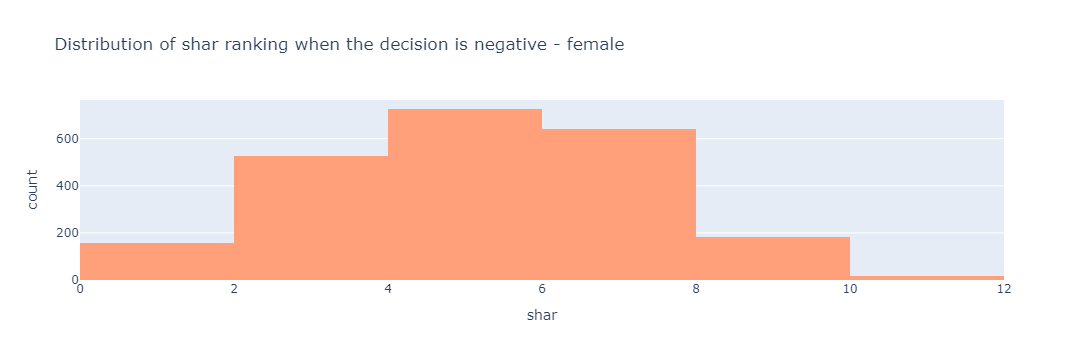

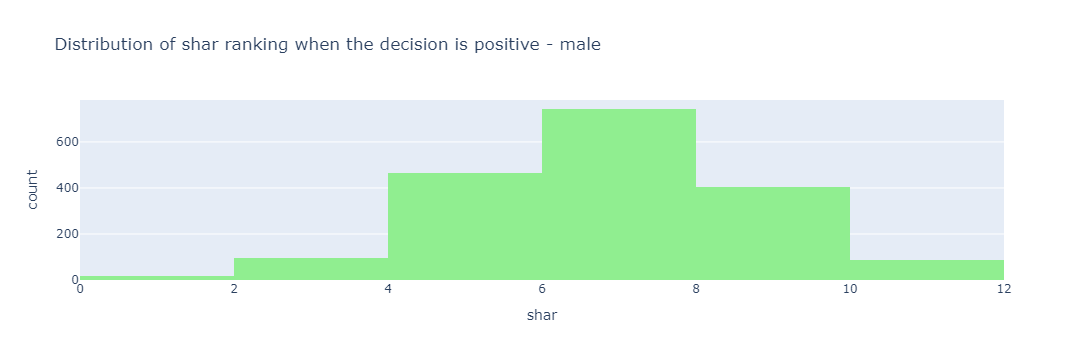

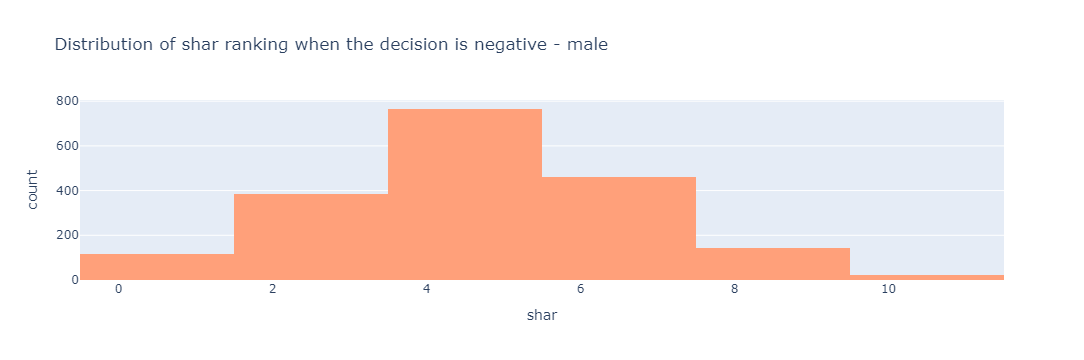

In [8]:
attributes = ['attr','sinc','intel','fun','amb','shar']

for attribute in attributes:
    for i in [0,1]:
        fig = px.histogram(
            df[(df['dec']==1)&(df['gender']==i)],
            x=attribute,
            color_discrete_sequence=['lightgreen'],
            nbins=10,
            title = 'Distribution of {} ranking when the decision is positive - {}'.format(attribute, 'male' if i==1 else 'female'),
        )
        fig.show()

        fig = px.histogram(
            df[(df['dec']==0)&(df['gender']==i)],
            x=attribute,
            color_discrete_sequence=['lightsalmon'],
            nbins=10,
            title = 'Distribution of {} ranking when the decision is negative - {}'.format(attribute, 'male' if i==1 else 'female')
        )
        fig.show()

Previous histograms are confirming the previous analyssis
- Intelligence, Sincerity and Ambition have a similar distribution for positive and negative decision, therefore are not the main drive
- On the other hand, Attractivness, Fun and Shared Activies are clearly showing different distribution, which shows that these criteria are driving the decision

Let's see if the is in line with the answer of the survey

## Survey Analysis

Let's review if the survey can be used. let's check if there are a lot of NaN in the dataframe

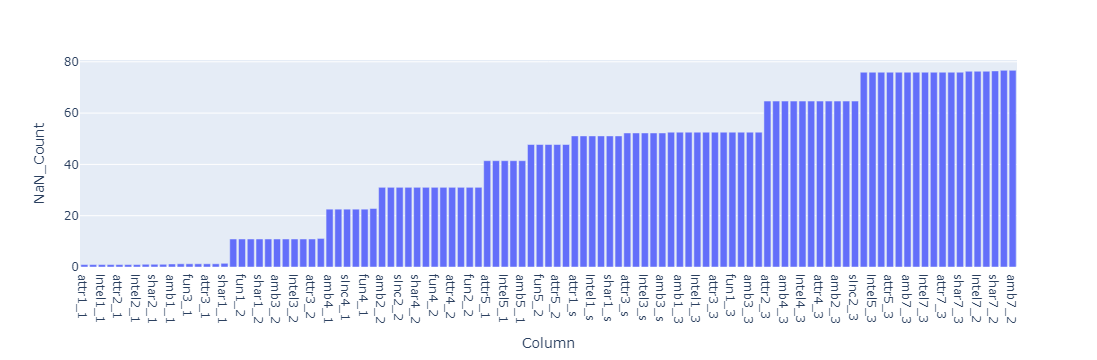

In [9]:
survey = []
for column in df.filter(regex='intel').columns:
    survey.append(column[5:])
survey.sort()
survey = survey[1:len(survey)-1]

columns_survey=[]
for columns in df.columns:
    for test in survey:
        if test in columns:
            columns_survey.append(columns)
            break

nan_counts = (df[columns_survey].isna().mean()*100).sort_values().reset_index()
nan_counts.columns = ['Column', 'NaN_Count']
nan_counts


fig = px.bar(
    nan_counts,
    x='Column',
    y='NaN_Count'   
)
fig.show()


In [10]:
surveys = []
for column in df.filter(regex='intel').columns:
    surveys.append(column[5:])
surveys.sort()
surveys = survey[1:len(surveys)-1]


columns_survey=[]
for columns in df.columns:
    for test in surveys:
        if test in columns:
            columns_survey.append(columns)
            break

max_nan = {i: 0 for i in surveys}
print(max_nan)

for column in df[columns_survey].columns:
    for item in survey:
        if item in column:
            if max_nan[item]<df[column].isna().mean()*100:
                max_nan[item]=df[column].isna().mean()*100


max_nan.pop('2_1')  #2_1 is What do you think the opposite sex looks for in a date?. Will be used later
max_nan.pop('3_1')  #3_1 is How do you think you measure up?. Cannot be used
max_nan.pop('3_2')  #3_1 is How do you think you measure up?. Cannot be used

print(min(max_nan,key=max_nan.get),max_nan[min(max_nan,key=max_nan.get)])

{'1_2': 0, '1_3': 0, '1_s': 0, '2_1': 0, '2_2': 0, '2_3': 0, '3_1': 0, '3_2': 0, '3_3': 0, '3_s': 0, '4_1': 0, '4_2': 0, '4_3': 0, '5_1': 0, '5_2': 0, '5_3': 0, '7_2': 0, '7_3': 0}
1_2 11.136309381714012


The survey to be used it the 1_2 has there are almost 90% answer and the question is in line with our research : We want to know what you look for in the opposite sex. 

However, there are 2 different ratings that cannot be compared. Let's find which are the wave with the most partipant

In [28]:
df[df['wave'].isin([i for i in range(1,6)]+[i for i in range(10,22)])].shape

(6816, 196)

In [12]:
df_survey = df[df['wave'].isin([i for i in range(1,6)]+[i for i in range(10,22)])]
column_survey = [item for item in df_survey.columns if '1_1' in item]
for column in column_survey:
    df_survey = df_survey[df_survey[column].notna()]

df_survey_attributes = df_survey.groupby(['gender'])[column_survey].mean()
df_survey_attributes

attr1_1    sinc1_1   intel1_1     fun1_1     amb1_1    shar1_1
gender                                                                  
0       18.648623  18.432483  21.512705  17.090132  12.018897  12.264193
1       28.925728  16.240439  19.591681  17.650809   7.498773  10.258607

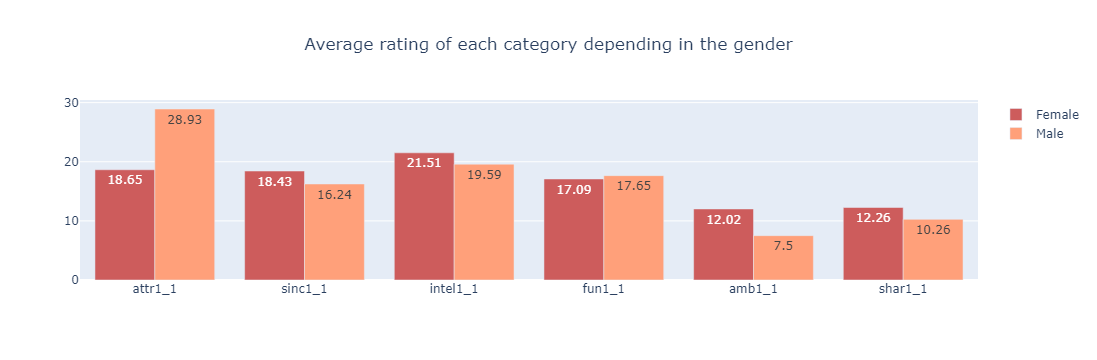

In [13]:
y_female = df_survey_attributes.iloc[0,0:]
y_male = df_survey_attributes.iloc[1,0:]
column = column_survey

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=column,
        y = y_female,
        name='Female',
        marker_color='indianred',
        text=round(y_female,2),
        textposition='auto'
    )
)

fig.add_trace(
    go.Bar(
        x=column,
        y = y_male,
        name='Male',
        marker_color='lightsalmon',
        text=round(y_male,2),
        textposition='auto'
    )
)



fig.update_layout(
    title = go.layout.Title(text='Average rating of each category depending in the gender', x=0.5),
    width=800
)
fig.show()

Overall, this confirms what we already saw
- Attractivness and Intelligence are the most important criteria. 
- However, we can see that Male are over-rating Attractivness whereas Female are looking for Intelligence in first place

Let's see how they see the other gender

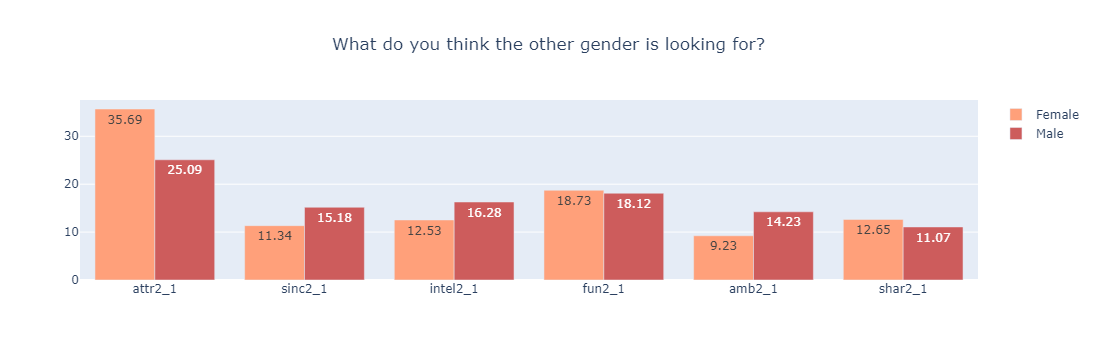

In [14]:
column_survey = [item for item in df.columns if '2_1' in item]
for column in column_survey:
    df_survey = df[df[column].notna()]

df_survey_attributes = df.groupby(['gender'])[column_survey].mean()
df_survey_attributes

y_female = df_survey_attributes.iloc[0,0:]
y_male = df_survey_attributes.iloc[1,0:]
column = column_survey

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=column,
        y = y_female,
        name='Female',
        marker_color='lightsalmon',
        text=round(y_female,2),
        textposition='auto'
    )
)

fig.add_trace(
    go.Bar(
        x=column,
        y = y_male,
        name='Male',
        marker_color='indianred',
        text=round(y_male,2),
        textposition='auto'
    )
)



fig.update_layout(
    title = go.layout.Title(text='What do you think the other gender is looking for? ', x=0.5),
    width=800
)
fig.show()

It seems that attractivness is overestimated


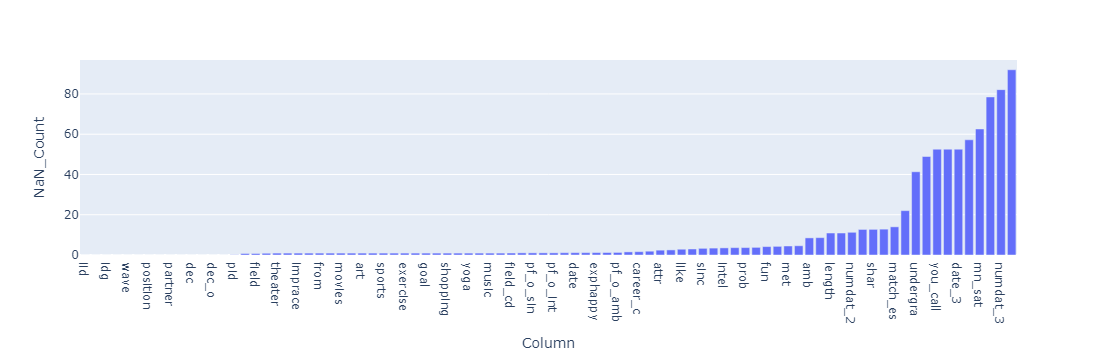

In [15]:
list_column = [col for col in df.columns if not any(item in col for item in survey)]

nan_counts = (df[list_column].isna().mean()*100).sort_values().reset_index()
nan_counts.columns = ['Column', 'NaN_Count']
nan_counts


fig = px.bar(
    nan_counts,
    x='Column',
    y='NaN_Count'   
)
fig.show()

The shared interests are correctly filled. Let's see what can be anlyzed with it

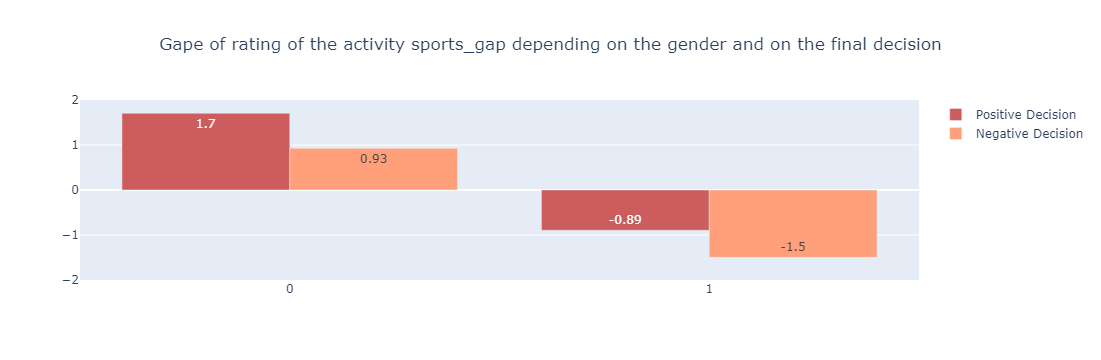

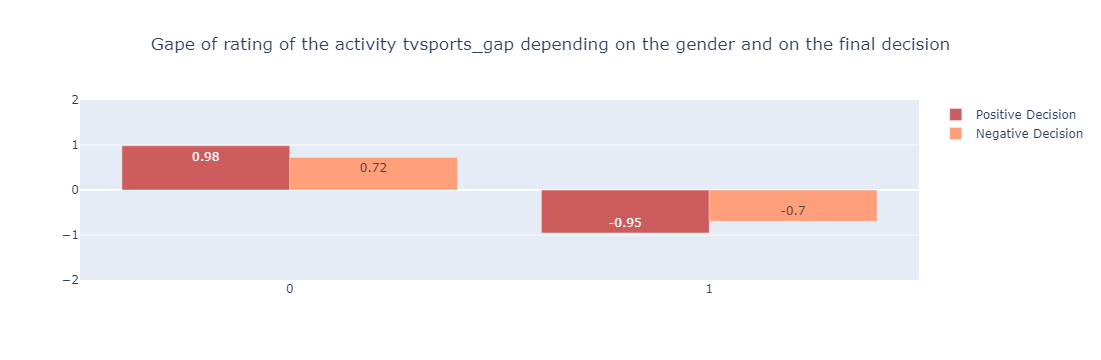

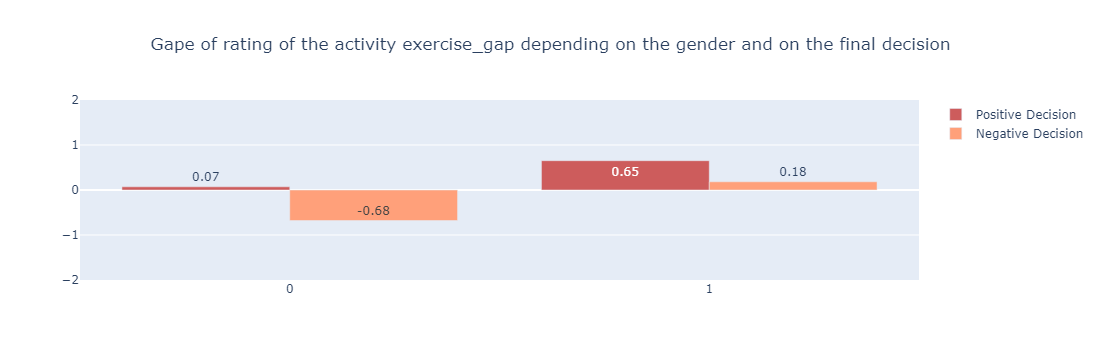

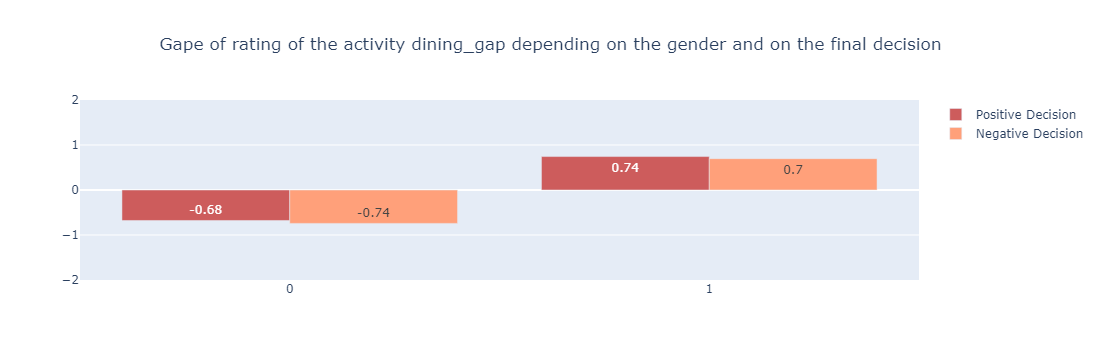

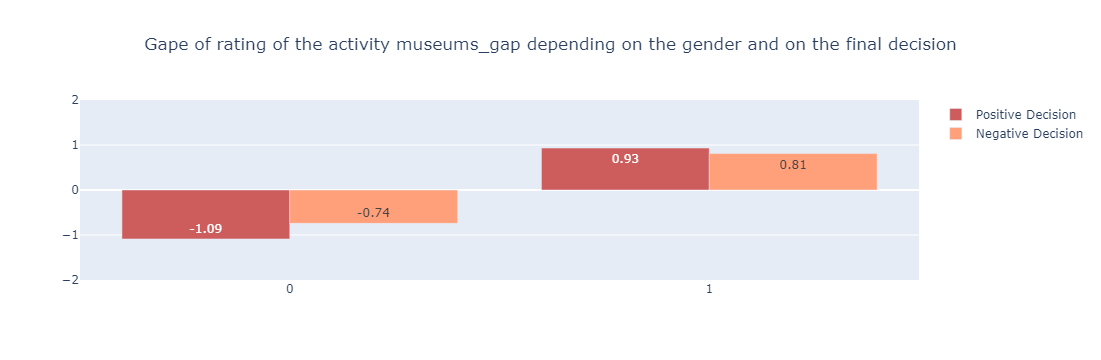

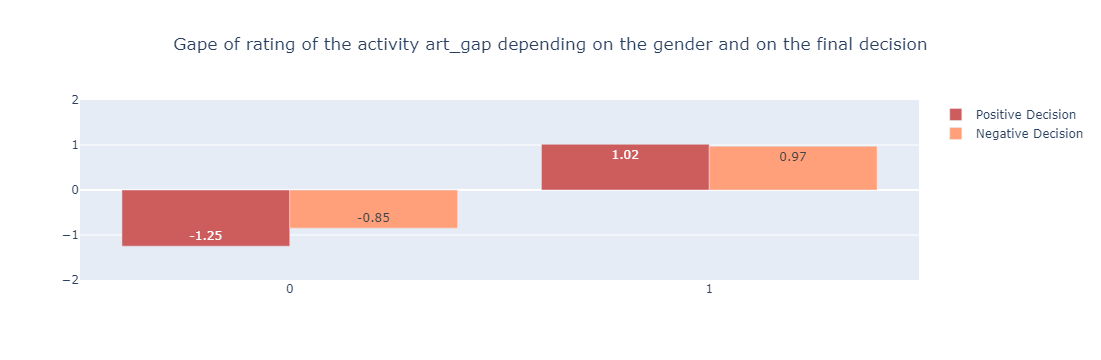

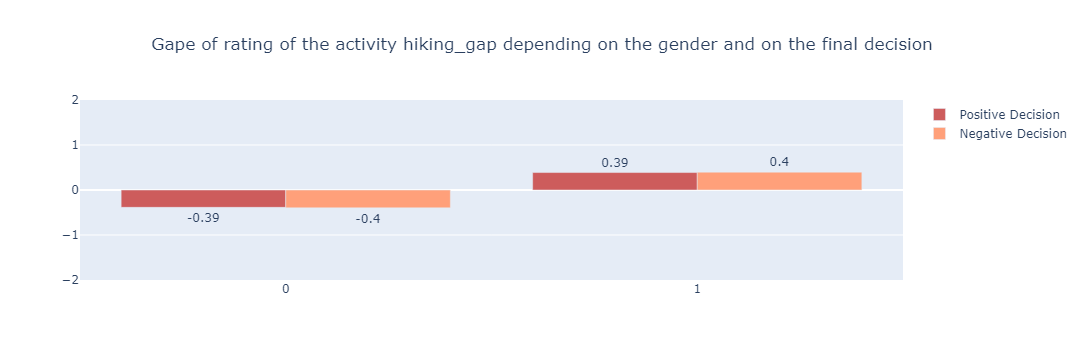

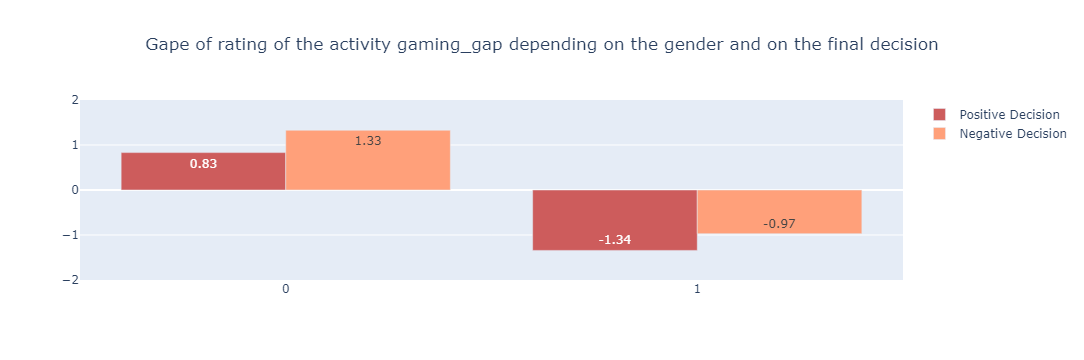

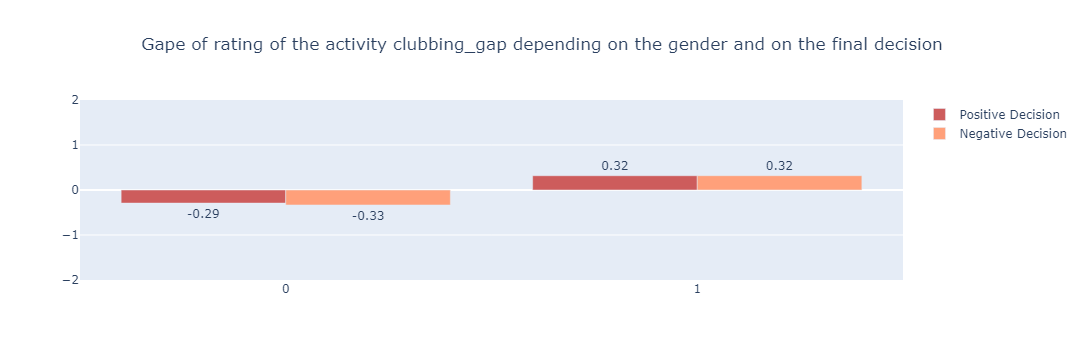

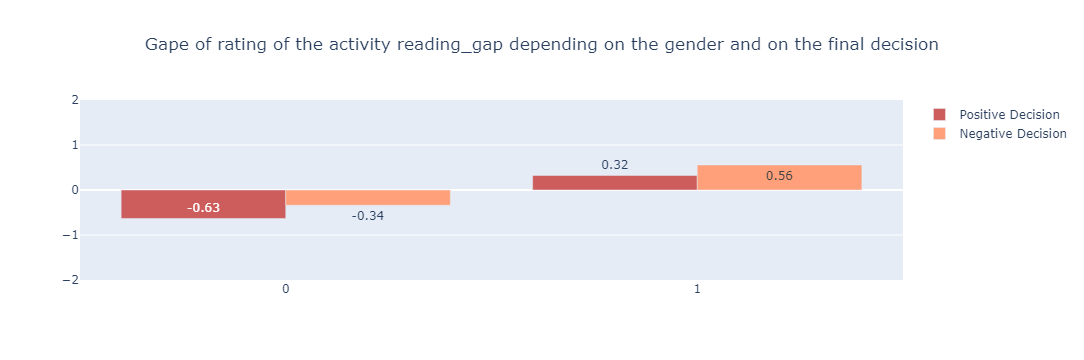

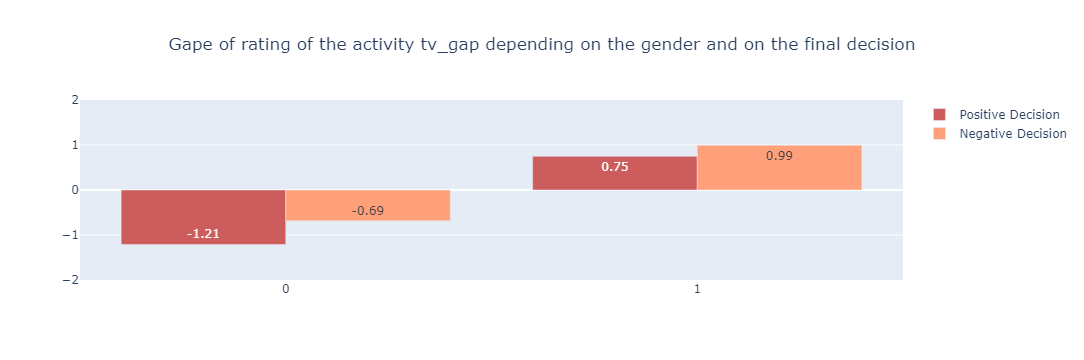

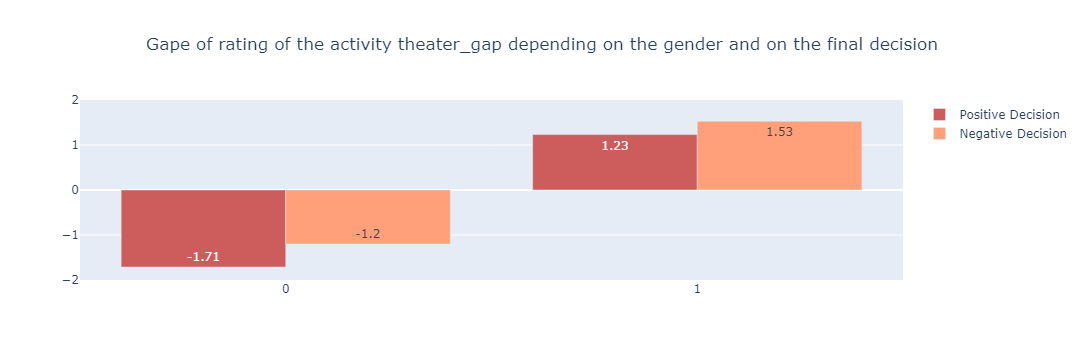

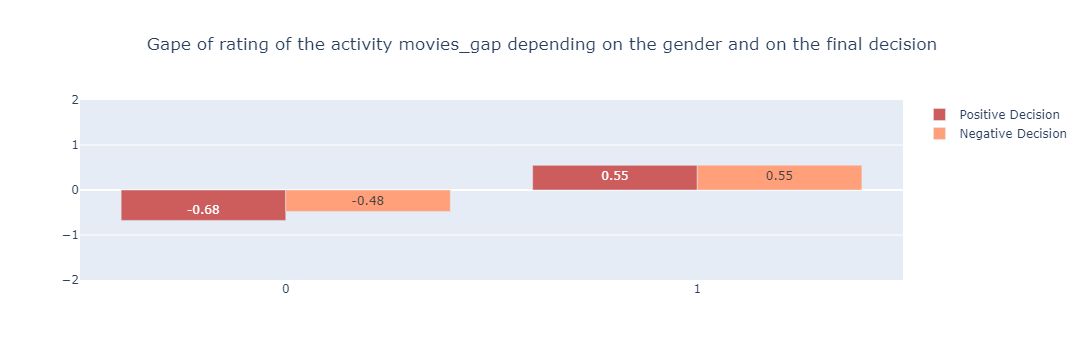

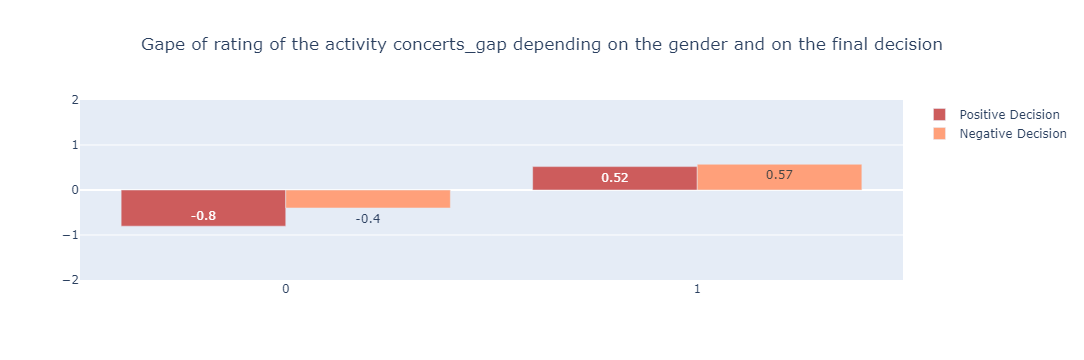

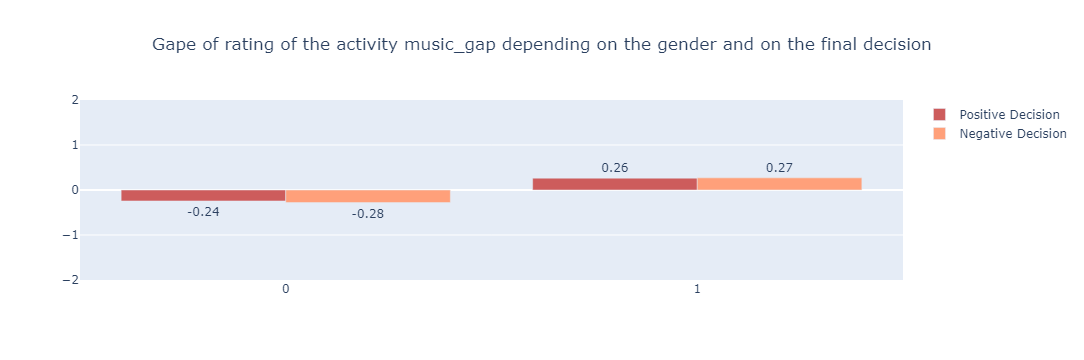

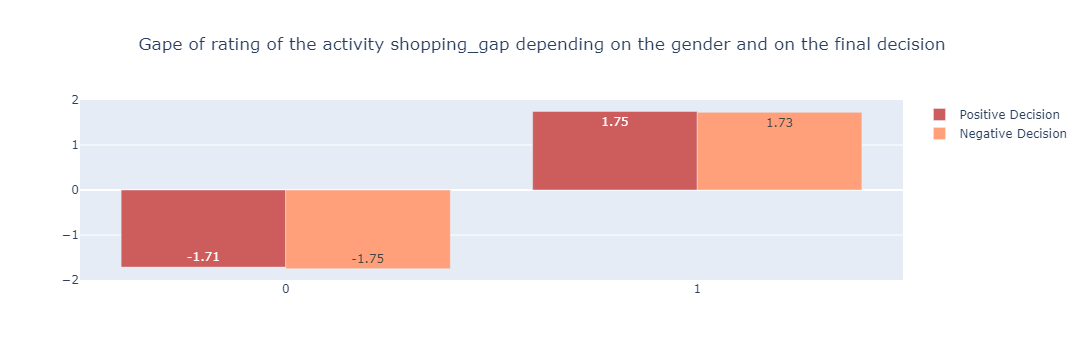

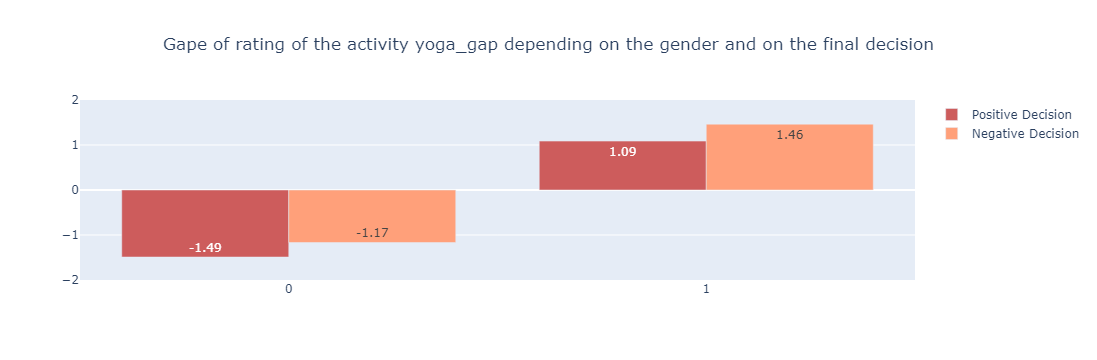

In [16]:
activities = ['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga']
activities_o = [item+'_o' for item in activities]

df_activities = df
for item in activities:
    df_activities = df_activities[df_activities[item].notna()]

df_rating_partner = df_activities.groupby('iid')[activities].mean()
df_rating_partner.columns = activities_o

df_activities = df_activities.merge(df_rating_partner, left_on='pid',right_on='iid',how='left')
df_activities = df_activities[['iid','gender','dec']+activities+activities_o]

activities_gap = [item+'_gap' for item in activities]
df_activities[activities_gap] = 0

for item in activities : 
    df_activities[item+'_gap'] = df_activities[item+'_o'] - df_activities[item]

df_activities_gap = df_activities.groupby(['gender','dec'])[activities_gap].mean().reset_index()



for activity in activities_gap:
    fig = go.Figure()
    gender = df_activities_gap['gender'].unique()

    fig.add_trace(
        go.Bar(
            x=gender,
            y = df_activities_gap[df_activities_gap['dec']==1][activity],
            name='Positive Decision',
            marker_color='indianred',
            text=round(df_activities_gap[df_activities_gap['dec']==1][activity],2),
            textposition='auto'
        )
    )

    fig.add_trace(
        go.Bar(
            x=gender,
            y = df_activities_gap[df_activities_gap['dec']==0][activity],
            name='Negative Decision',
            marker_color='lightsalmon',
            text=round(df_activities_gap[df_activities_gap['dec']==0][activity],2),
            textposition='auto'
        )
    )



    fig.update_layout(
        title = go.layout.Title(text='Gape of rating of the activity {} depending on the gender and on the final decision'.format(activity), x=0.5),
        width=800,
    )
    fig.update_yaxes(range=[-2, 2])
    fig.show()

In this graphs, we can see that there are gender-biaised activities
- Male seems to have higher rating in sports and gaming while female have higher rating in yoga, theatre and shopping
- Interests in sports seems to be seen positively. Women have higher positive answer for male with higher interest in sports while men have lower positive answer if the partner have low interest in sports
- On the other hand, gaming is seen relatively negatively 
- Clubbing, music, shopping seems quite neutral

Overall, it seems that having diffent share activities is not a deal breaker but there are activities that scores best than others

## Deep-Dive Analysis


Based on the exiting dataset, we can deep-dive and check the influence of the followign factors
- Age
- Race
- Position inside the wave

### Position inside the wave

for female, the average positive answer is 0.37


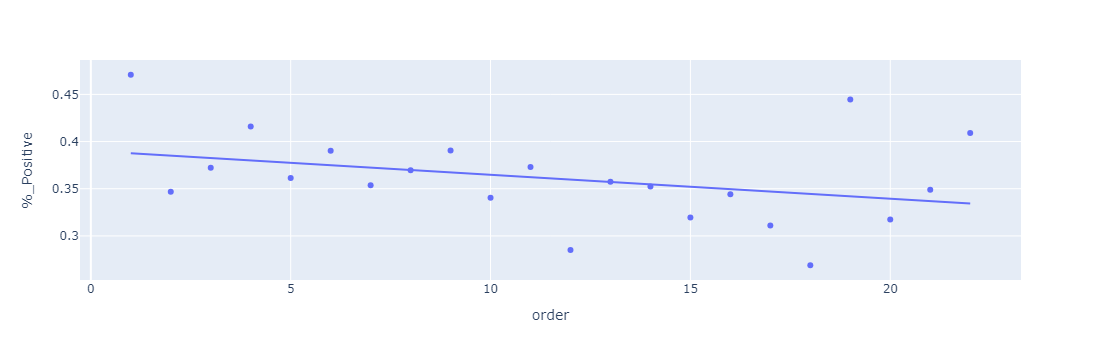

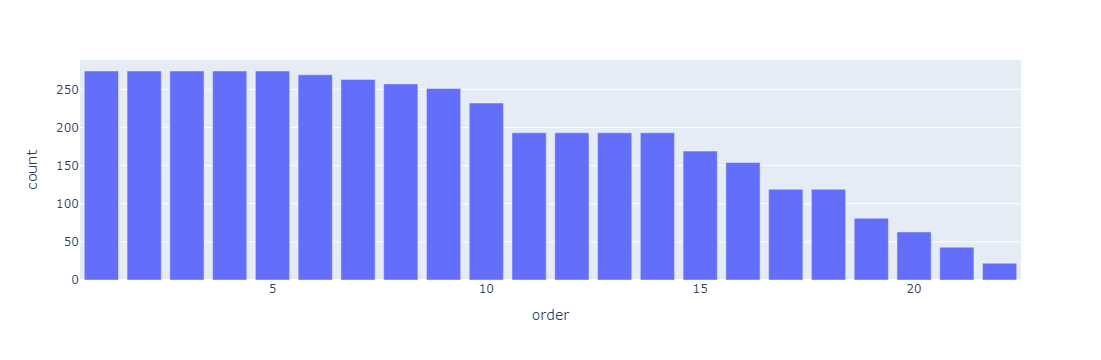

for male, the average positive answer is 0.47


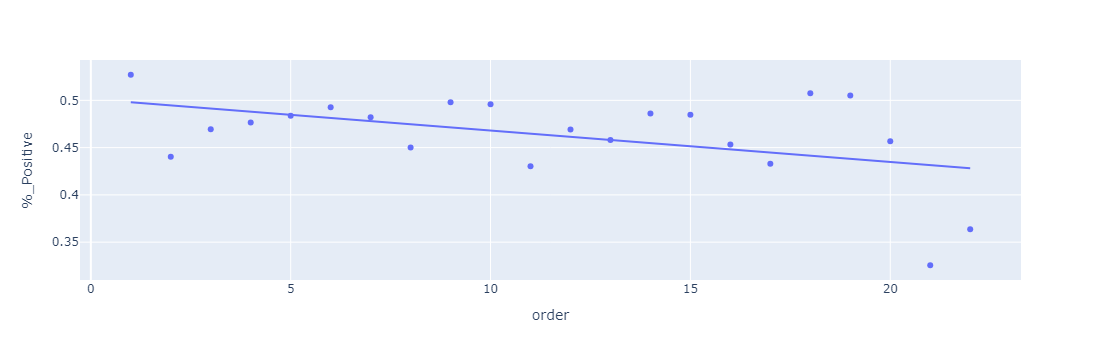

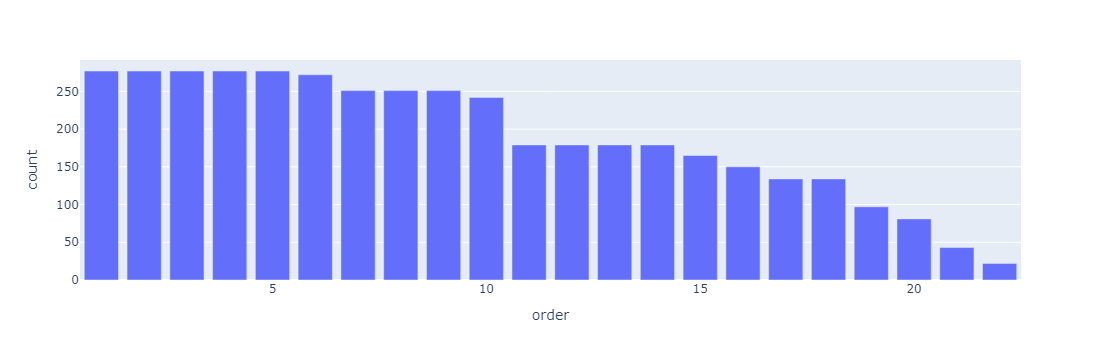

0.4742489270386266


In [17]:
df_by_order = df[df['gender']==0].groupby(['order'])['dec'].agg(['sum','count']).reset_index()
print('for female, the average positive answer is {}'.format(round(df_by_order['sum'].sum()/df_by_order['count'].sum(),2)))
df_by_order['%_Positive'] = 0
df_by_order['%_Positive'] = df_by_order['sum']/df_by_order['count']
fig = px.scatter(
    df_by_order,
    x='order',
    y='%_Positive',
    trendline='ols'
)
fig.show()



fig = px.bar(
    df_by_order,
    x='order',
    y='count',
)
fig.show()


df_by_order = df[df['gender']==1].groupby(['order'])['dec'].agg(['sum','count']).reset_index()
print('for male, the average positive answer is {}'.format(round(df_by_order['sum'].sum()/df_by_order['count'].sum(),2)))

df_by_order['%_Positive'] = 0
df_by_order['%_Positive'] = df_by_order['sum']/df_by_order['count']
fig = px.scatter(
    df_by_order,
    x='order',
    y='%_Positive',
    trendline='ols'
)



fig.show()

fig = px.bar(
    df_by_order,
    x='order',
    y='count',
)
fig.show()

print(df_by_order['sum'].sum()/df_by_order['count'].sum())


With this analysis, we can see that the order has an important role : 
- The first order seems to have a higher positive answer both for male and female. Seems like the first round has a positive impact
- On the other, the second order seems to be one of the order with the lowest positive ratio. Their could be a phsychological bias that would decrease the chance of sucess when the first is positive
- The ration of positive answer slightly decrease during the wave

In [18]:
df_2nd_position = df[df['order'].isin([1,2])][['iid','order','dec']]
df_2nd_position['1r_dec']=0
order1_dec =df_2nd_position[df_2nd_position['order']==1][['iid','dec']].set_index('iid')
order1_dec = order1_dec.copy()

df_2nd_position.loc[df_2nd_position['order']==2,'1r_dec'] = df_2nd_position.loc[df_2nd_position['order'] == 2, 'iid'].map(order1_dec['dec'])
df_2nd_position = df_2nd_position.reset_index(drop=True)
df_2nd_position



df_2nd_position.groupby(['order','1r_dec'])['dec'].agg(['sum','count']).reset_index()


order  1r_dec  sum  count
0      1       0  275    551
1      2       0   79    276
2      2       1  138    275

### Age

In the dataset, there is for the majority of the subjects and partner their age. Let's check how the age_gap is impacting the final decision

male


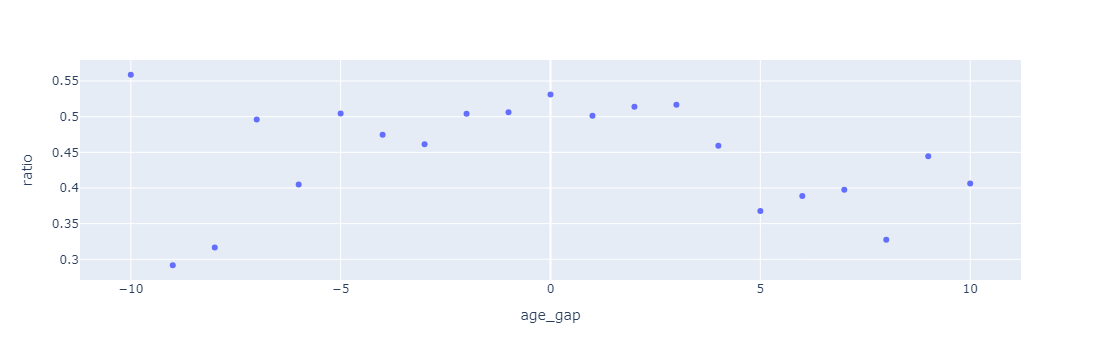

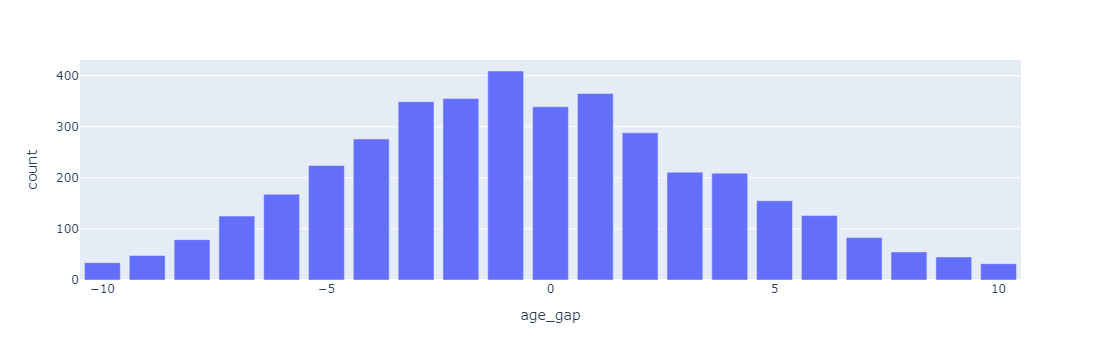

female


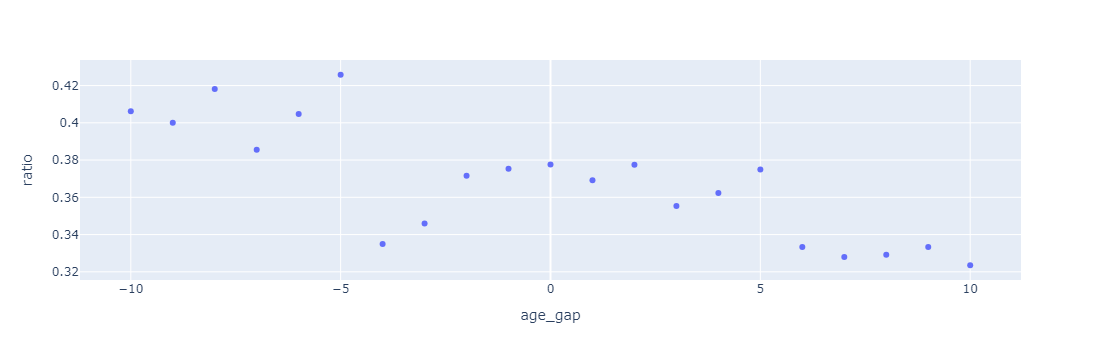

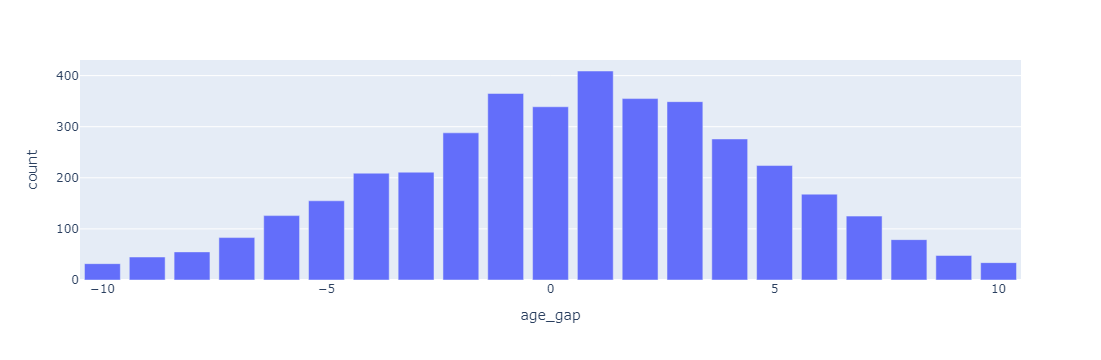

In [19]:
df['age_gap'] = df['age_o'] - df['age']

print('male')
df_age_gap = df[df['gender']==1].groupby(['age_gap'])['dec'].agg(['sum','count']).reset_index()
df_age_gap['ratio'] = df_age_gap['sum'] / df_age_gap['count']
df_age_gap=df_age_gap[df_age_gap['count']>30]

fig = px.scatter(
    df_age_gap,
    x='age_gap',
    y='ratio'
)
fig.show()

fig = px.bar(
    df_age_gap,
    x='age_gap',
    y='count'
)
fig.show()

print('female')

df_age_gap = df[df['gender']==0].groupby(['age_gap'])['dec'].agg(['sum','count']).reset_index()
df_age_gap['ratio'] = df_age_gap['sum'] / df_age_gap['count']
df_age_gap=df_age_gap[df_age_gap['count']>30]

fig = px.scatter(
    df_age_gap,
    x='age_gap',
    y='ratio'
)
fig.show()

fig = px.bar(
    df_age_gap,
    x='age_gap',
    y='count'
)
fig.show()

### Race

Let's see how biaised are the participant based on race

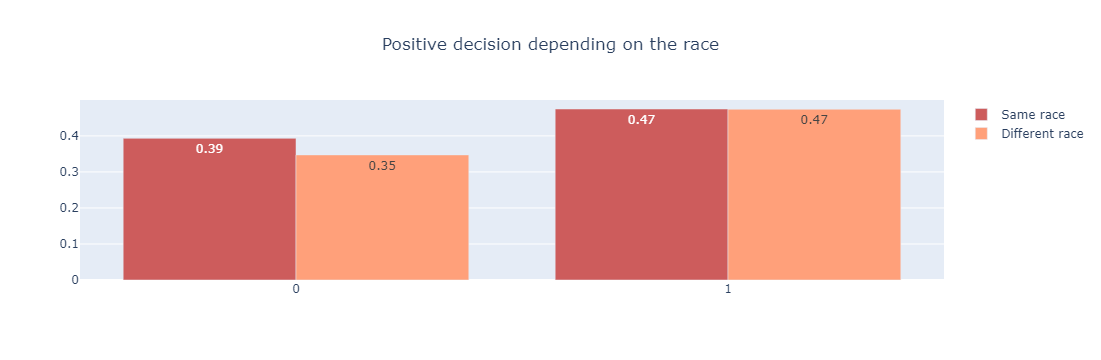

In [20]:
df_attributes_race = df.groupby(['gender','samerace'])['dec'].agg(['sum','count']).reset_index()
df_attributes_race['percentage'] = df_attributes_race['sum']/df_attributes_race['count']  
df_attributes_race


fig = go.Figure()
gender = df_attributes_race['gender'].unique()

fig.add_trace(
    go.Bar(
        x=gender,
        y = df_attributes_race[df_attributes_race['samerace']==1]['percentage'],
        name='Same race',
        marker_color='indianred',
        text=round(df_attributes_race[df_attributes_race['samerace']==1]['percentage'],2),
        textposition='auto'
    )
)

fig.add_trace(
    go.Bar(
        x=gender,
        y = df_attributes_race[df_attributes_race['samerace']==0]['percentage'],
        name='Different race',
        marker_color='lightsalmon',
        text=round(df_attributes_race[df_attributes_race['samerace']==0]['percentage'],2),
        textposition='auto'
    )
)



fig.update_layout(
    title = go.layout.Title(text='Positive decision depending on the race'.format(attribute), x=0.5),
    width=800
)
fig.show()


Race seems to have a limited impact on the positive decision. For male, there is strictly no difference, while women have a slight preference for partner with the same race

### Reason for coming

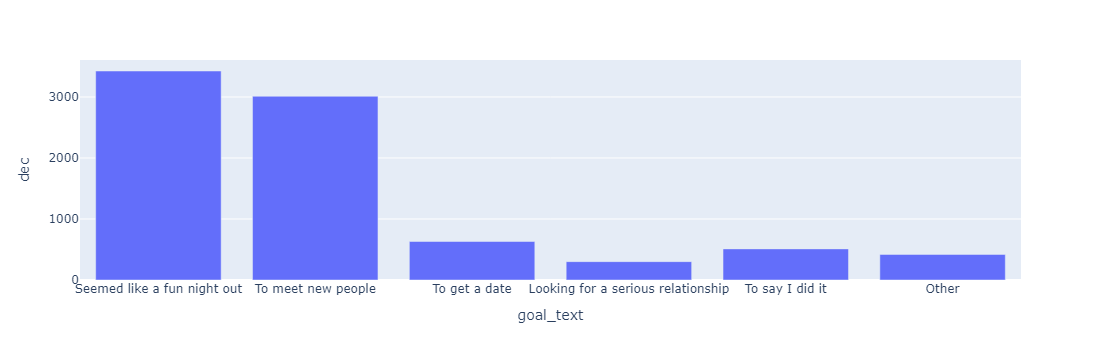

In [47]:
df_temp = df.groupby('goal')['dec'].count().reset_index()

goal_mapping = {
    1.0: 'Seemed like a fun night out',
    2.0: 'To meet new people',
    3.0: 'To get a date',
    4.0: 'Looking for a serious relationship',
    5.0: 'To say I did it',
    6.0: 'Other'
}

df_temp['goal_text'] = df_temp['goal'].map(goal_mapping)
fig = px.bar(
    df_temp,
    x='goal_text',
    y='dec'
)
fig.show()

Large majority answered that they were here because it seemed like a fun night out or to meet new people. Overall, there is a minority of people sincerly looking for a date or a relationship



Race and Religion seems to be an important criteria when selecting a partner. However, it is not in line with the analysis that showed that the race has limited impact on the answer

### Final Date

In [51]:
df_final_date = df[df['date_3'].notna()]
df_final_date

iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

      ...  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0     ...      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1     ...      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2     ...      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3     ...      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4     ...      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
...   ...      ...       ...     ...     ...      ...      ...       ...   
8373  ...      5.0       7.0     6.0     7.0      9.0      5.0       9.0   
8374  ...      5.0       7.0     6.0     7.0      9.0      5.0       9.0   
8375  ...      5.0       7.0     6.0     7.0      9.0      5.0       9.0   
8376  ...      5.0       7.0     6.0     7.0      9.0      5.0       9.0   
8377  ...      5.0       7.0     6.0     7.0      9.0      5.0       9.0   

      fun5_3  amb5_3  age_gap  
0        NaN     NaN      6.0  
1        NaN     NaN      1.0  
2        NaN     NaN      1.0  
3        NaN     NaN      2.0  
4        NaN     NaN      3.0  
...      ...     ...      ...  
8373     5.0     6.0      1.0  
8374     5.0     6.0     -1.0  
8375     5.0     6.0      4.0  
8376     5.0     6.0     -3.0  
8377     5.0     6.0     -3.0  

[3974 rows x 196 columns]

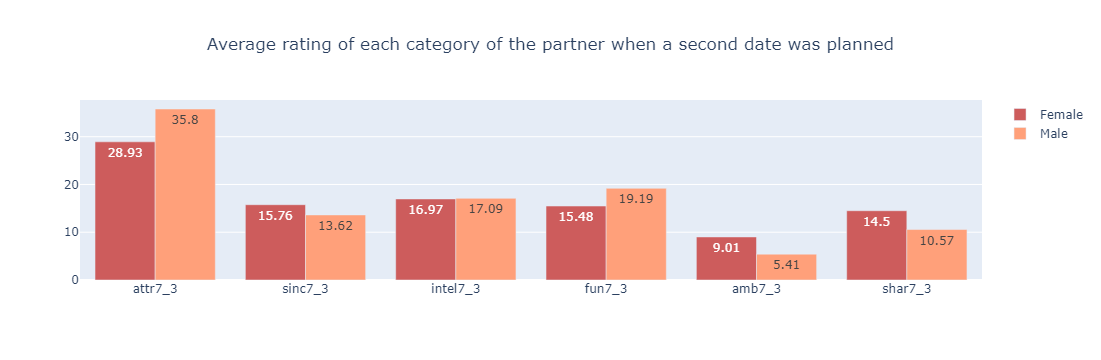

In [63]:
attributes = ['attr7_3','sinc7_3','intel7_3','fun7_3','amb7_3','shar7_3']
df_final_date = df[df['date_3'].notna()]
df_positive = df_final_date[df_final_date['date_3']==1]
df_positive_mean = df_positive.groupby(['gender'])[attributes].mean().reset_index()
df_positive_mean


y_female = df_positive_mean.iloc[0,1:]
y_male = df_positive_mean.iloc[1,1:]
column = df_positive_mean.columns[1:]

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=column,
        y = y_female,
        name='Female',
        marker_color='indianred',
        text=round(y_female,2),
        textposition='auto'
    )
)

fig.add_trace(
    go.Bar(
        x=column,
        y = y_male,
        name='Male',
        marker_color='lightsalmon',
        text=round(y_male,2),
        textposition='auto'
    )
)



fig.update_layout(
    title = go.layout.Title(text='Average rating of each category depending on the gender for people that went on a date', x=0.5),
    width=800
)
fig.show()



Overal, it seems that the attractivness is the highest criteria when there is a second date planned